# 사전에 없는 단어의 문제

```
코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤
전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.

→

<unk>는 2019년 12월 중국 <unk>에서 처음 발생한 뒤
전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.
```

 만약 위 문장을 영문으로 번역해야 한다면 어떨까요? 핵심인 단어 `코로나바이러스`와 `우한`을 모른다면 제대로 해낼 수 있을 리가 없습니다. 이를 **OOV(Out-Of-Vocabulary)** 문제라고 합니다. 이처럼 **새로 등장한(본 적 없는) 단어에 대해 약한 모습**을 보일 수밖에 없는 기법들이기에, 이를 해결하고자 하는 시도들이 있었습니다. 그리고 그것이 우리가 다음 스텝에서 배울, ***Wordpiece Model***이죠!

*Wordpiece Model(WPM)* 은 우리가 접한 적이 있는 아이디어를 기반으로 만들어졌습니다. 두 단어 `preview`와 `predict`를 보면 접두어인 `pre`가 공통되고 있죠? `pre`가 들어간 단어는 주로 **"미리", "이전의"** 와 연계되는 의미를 가지고 있습니다. 컴퓨터도 두 단어를 따로 볼 게 아니라 `pre+view`와 `pre+dict`로 본다면 학습을 더 잘 할 수 있지 않을까요?

이처럼 한 단어를 여러 개의 Subword의 집합으로 보는 방법이 WPM입니다. WPM의 원리를 알기 전, 먼저 알아야 할 것이 바로 **Byte Pair Encoding(BPE)** 입니다.

# Byte Pair Encoding(BPE)

---

BPE 알고리즘이 고안된 것은 1994년입니다. 그때는 자연어 처리에 적용하기 위해서가 아니라 데이터 압축을 위해서 생겨났었죠. 데이터에서 **가장 많이 등장하는 바이트 쌍(Byte Pair)** 을 새로운 단어로 치환하여 압축하는 작업을 반복하는 방식으로 동작합니다. 예시는 아래와 같습니다.

```
aaabdaaabac # 가장 많이 등장한 바이트 쌍 "aa"를 "Z"로 치환합니다.
→ 
ZabdZabac   # "aa" 총 두 개가 치환되어 4바이트를 2바이트로 압축하였습니다.
Z=aa        # 그다음 많이 등장한 바이트 쌍 "ab"를 "Y"로 치환합니다.
→ 
ZYdZYac     # "ab" 총 두 개가 치환되어 4바이트를 2바이트로 압축하였습니다.
Z=aa        # 여기서 작업을 멈추어도 되지만, 치환된 바이트에 대해서도 진행한다면
Y=ab        # 가장 많이 등장한 바이트 쌍 "ZY"를 "X"로 치환합니다.
→ 
XdXac
Z=aa
Y=ab
X=ZY       # 압축이 완료되었습니다!
```

아주 직관적인 알고리즘이죠? 이를 토큰화에 적용하자고 제안한 것은 2015년이었습니다. 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치면, 접두어나 접미어의  의미를 캐치할 수 있고, 처음 등장하는 단어는 문자(알파벳)들의 조합으로 나타내어 **OOV 문제를 완전히 해결**할 수 있다는 것이죠!

비교적 최근의 기술을 소개해드리는 만큼 논문을 함께 첨부합니다.

- [Neural Machine Translation of Rare Words with Subword Units](https://arxiv.org/pdf/1508.07909.pdf)

위 논문은 Python 소스 코드를 함께 제공해 주어 간편하게 실습을 해 볼 수 있습니다. 논문에서 제공해 주는 예제로 동작 방식을 자세히 들여다보죠!

# n-grams
- 유니그램(uni-gram)
- 바이그램(bi-gram)
- 트라이그램(tri-gram)<br>
나는 학교에 가서 공부를 합니다.

In [ ]:
def n_grams(text, n):
  return [text[i:i+n] for i in range(len(text) - n + 1)]

cleaned = ["mary", ",", "n't", "slap", "green", "witch", "."]
print(n_grams(cleaned, 1)) # uni-gram 1덩이씩 출력
print(n_grams(cleaned, 2)) # bi-gram 2덩이씩 출력
print(n_grams(cleaned, 3)) # tri-gram 3덩이씩 출력

[['mary'], [','], ["n't"], ['slap'], ['green'], ['witch'], ['.']]
[['mary', ','], [',', "n't"], ["n't", 'slap'], ['slap', 'green'], ['green', 'witch'], ['witch', '.']]
[['mary', ',', "n't"], [',', "n't", 'slap'], ["n't", 'slap', 'green'], ['slap', 'green', 'witch'], ['green', 'witch', '.']]


In [ ]:
def n_grams(text, n):
  for i in range(len(text) - n + 1):
    text[i : i + n]
    return text

cleaned = ["mary", ",", "n't", "slap", "green", "witch", "."]
print(n_grams(cleaned, 1)) # uni-gram 1덩이씩 출력
print(n_grams(cleaned, 2)) # bi-gram 2덩이씩 출력
print(n_grams(cleaned, 3)) # tri-gram 3덩이씩 출력

['mary', ',', "n't", 'slap', 'green', 'witch', '.']
['mary', ',', "n't", 'slap', 'green', 'witch', '.']
['mary', ',', "n't", 'slap', 'green', 'witch', '.']


# BPE Algorithm

In [ ]:
import re, collections

In [ ]:
num_merges = 10 # BPE를 몇 회 수행할 것지 정함.

```
# BPE corpus
corpus = """
low lower newest widest
low lower newest widest
low       newest widest
low       newest
low       newest
          newest
"""
```

In [ ]:
dictionary = {'l o w </w>' : 5,
              'l o w e r </w>' : 2,
              'n e w e s t </w>' : 6,
              'w i d e s t </w>' : 3
}

In [ ]:
def get_stats(dictionary):

    """
    단어 사전을 불러와
    단어는 공백 단위로 쪼개어 문자 list를 만들고
    빈도수와 쌍을 이루게 합니다. (symbols)
    """
    
  # 유니그램의 pair들의 빈도수를 카운트
    pairs = collections.defaultdict(int)
    for word, freq in dictionary.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i], symbols[i+1]] += freq
    print('현재 pair들의 빈도수 :', dict(pairs))
    return pairs

In [ ]:
def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

In [ ]:
bpe_codes = {}
bpe_codes_reverse = {}
for i in range(num_merges):
    print(">> Step {0}".format(i+1))
    pairs = get_stats(dictionary)
    best = max(pairs, key=pairs.get)
    dictionary = merge_dictionary(best, dictionary)

    bpe_codes[best] = i
    bpe_codes_reverse[best[0] + best[1]] = best

    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))

>> Step 1
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}
>> Step 2
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}
>> Step 3
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictiona

In [ ]:
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


# OOV 대처하기

만일 `lowest`라는 처음 보는 단어가 등장하더라도, 위 알고리즘을 따르면 어느 정도 의미가 파악된 `low`와 `est`의 결합으로 표현할 수 있습니다. 또 BPE의 놀라운 점은 아무리 큰 데이터도 원하는 크기로 OOV 문제없이 사전을 정의할 수 있다는 것입니다. 극단적으로 생각했을 때 알파벳 26개와 특수문자, 문장부호를 아무리 추가해도 100개 이내로 사전을 정의할 수 있죠.(물론 그러면 안 됩니다!!)

Embedding 레이어는  **단어의 개수 x Embedding 차원 수** 의 Weight를 생성하기 때문에 단어의 개수가 줄어드는 것은 곧 메모리의 절약으로 이어집니다. 많은 데이터가 곧 정확도로 이어지기 때문에 이런 기여는 굉장히 의미가 있습니다!

하지만 아직도! 완벽하다고는 할 수 없습니다. 만약 수많은 데이터를 사용해 만든 BPE 사전으로 모델을 학습시키고 문장을 생성하게 했다고 합시다. 그게 `[i, am, a, b, o, y, a, n, d, you, are, a, gir, l]`이라면, 어떤 기준으로 이들을 결합해서 문장을 복원하죠? 몽땅 한꺼번에 합쳤다간 끔찍한 일이 벌어질 것만 같습니다... 

In [ ]:
def get_pairs(word):
  pairs = set()
  prev_char = word[0]
  for char in word[1:]:
    pairs.add((prev_char, char))
    prev_char = char
  return pairs

In [ ]:
orig = 'hi'
word = tuple(orig) + ('</w>',)
print(word)

('h', 'i', '</w>')


In [ ]:
def encode(orig):
  word = tuple(orig) + ('</w>',)
  print("__word split into characters:__ <tt>{}<tt>".format(word))

  pairs = get_pairs(word)

  if not pairs:
    return orig
  
  iteration = 0
  while True:
    iteration += 1
    print("__Iteration {}:__".format(iteration))

    print("Bigram in the word: {}".format(pairs))
    bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
    print("candidate for merging: {}".format(bigram))
    if bigram not in bpe_codes:
      print("__Candidate not in BPE merges, algorithm stops.__")
      break
    first, second = bigram
    new_word = []
    i = 0
    while i < len(word):
      try:
        j = word.index(first, i)
        new_word.extend(word[i:j])
        i = j
      except:
        new_word.extend(word[i:])
        break

      if word[i] == first and i < len(word)-1 and word[i+1] == second:
        new_word.append(first+second)
        i += 2
      else:
        new_word.append(word[i])
        i += 1
    new_word = tuple(new_word)
    word = new_word
    print("word after merging : {}".format(word))
    if len(word) == 1:
      break
    else:
      pairs = get_pairs(word)
  
  # 특별토큰인 </w>는 출력하지 않는다.
  if word[-1] == '</w>':
    word = word[:-1]
  elif word[-1].endswith('</w>'):
    word = word[:-1] + (word[-1].replace('</w>', ''), )
  return word

단어 'loki'가 들어오면 BPE 알고리즘 해당 단어를 어떻게 분리할까요?

In [ ]:
encode("loki")

현재 서브워드 단어집합에는 'lo'가 존재하므로, 'lo'는 유지하고 'k'와 'i'는 분리시킵니다. 단어 'lowest'에 대해서도 수행해봅시다.

In [ ]:
encode("lowest")

현재 서브워드 단어집합에 'low'와 'est'가 존재하므로, 'low'와 'est'를 분리시킵니다. 단어 'lowing'에 대해서도 수행해봅시다.

In [ ]:
encode("lowing")

현재 서브워드 단어집합에 'low'가 존재하지만, 'i', 'n', 'g'의 바이그램 조합으로 이루어진 서브워드는 존재하지 않으므로 'i', 'n', 'g'로 전부 분리합니다. 훈련된 데이터 중에서 어떤 서브워드도 존재하지 않는 'highing'은 어떨까요?

In [ ]:
encode("highing")

# Wordpiece Model(WPM)

이에 구글에서 BPE를 변형해 제안한 알고리즘이 바로 WPM입니다. WPM은 BPE에 대해 **두 가지 차별성**을 가집니다.

1. 공백 복원을 위해 단어의 시작 부분에 언더바 _ 를 추가합니다.
2. 빈도수 기반이 아닌 가능도(Likelihood)를 증가시키는 방향으로 문자 쌍을 합칩니다.

첫 번째 문항은 아주 쉬운 내용으로, 앞서 사용한 예문을 빌리면 `[_i, _am, _a, _b, o, y, _a, n, d, _you, _are, _a, _gir, l]`로 토큰화를 한다는 것입니다. 이렇게 하면 문장을 복원하는 과정이 **1) 모든 토큰을 합친 후, 2) 언더바 _를 공백으로 치환**으로 마무리되어 간편하죠.

두 번째 문항은 다소 난해하게 다가올 수도 있습니다. 직관적인 이해를 얻고 넘어가는 것을 목표로 하죠. 본 내용은 아래 논문 3절과 4절에 자세하게 나와 있습니다.
   
- [JAPANESE AND KOREAN VOICE SEARCH](https://static.googleusercontent.com/media/research.google.com/ko//pubs/archive/37842.pdf)

(여기서 잠깐)
구글에서 이 기법을 한국어, 일본어 텍스트 처리를 위해 고려했다는 사실이 흥미롭지 않나요? 이 점은 2가지를 시사합니다. 
- 조사, 어미 등의 활용이 많고 복잡한 한국어 같은 모델의 토크나이저로 WPM이 좋은 대안이 될 수 있다.
- WPM은 어떤 언어든 무관하게 적용 가능한 language-neutral하고 general한 기법이다. 한국어 형태소 분석기처럼 한국어에만 적용 가능한 기법보다 훨씬 활용도가 크다.  

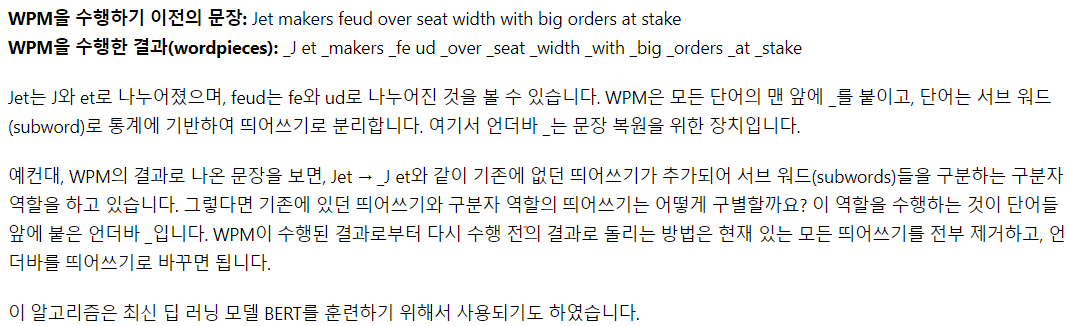

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 8.7 MB/s 


In [ ]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f253b5b4e50>)

In [ ]:
train_df = pd.read_csv("IMDb_Reviews.csv")

In [ ]:
train_df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [ ]:
print("리뷰 갯수 : ", len(train_df))

리뷰 갯수 :  50000


In [ ]:
with open("imdb_review.txt", "w", encoding = "utf-8") as f:
  f.write('\n'.join(train_df['review']))

```
spm.SentencePieceTrainer.train(
    f"--input={corpus} --model_prefix={prefix} --vocab_size={vocab_size + 7}" + 
    " --model_type=bpe" +
    " --max_sentence_length=999999" + # 문장 최대 길이
    " --pad_id=0 --pad_piece=[PAD]" + # pad (0)
    " --unk_id=1 --unk_piece=[UNK]" + # unknown (1)
    " --bos_id=2 --bos_piece=[BOS]" + # begin of sequence (2)
    " --eos_id=3 --eos_piece=[EOS]" + # end of sequence (3)
    " --user_defined_symbols=[SEP],[CLS],[MASK]") # 사용자 정의 토큰
```
```
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')
```

In [ ]:
corpus = "imdb_review.txt" # 입력 corpus
prefix = "imdb"
vocab_size = 5000
spm.SentencePieceTrainer.Train(
f"--input={corpus} --model_prefix={prefix} --vocab_size={vocab_size}" + 
    " --model_type=bpe" + " --max_sentence_length=999999" 
)

In [ ]:
vocab_list = pd.read_csv("imdb.vocab", sep="\t",
                         header = None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
866,▁last,-863
2321,▁Pr,-2318
429,ary,-426
3902,▁funniest,-3899
1463,▁After,-1460
1755,uc,-1752
649,▁down,-646
1007,▁less,-1004
3247,fort,-3244
2708,▁fairly,-2705


In [ ]:
len(vocab_list)

5000

In [ ]:
sp = spm.SentencePieceProcessor()
covab_file = "imdb.model"
sp.load(covab_file)

True

In [ ]:
lines = [
         "I didn't at all think of it this way.",
         "I have waited a long time for someone to film"
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line)) # 문장을 입력하면 서브워드 시퀀스로 변환
  print(sp.encode_as_ids(line)) # 문장을 입력하면 정수 시퀀스로 변환
  print()

I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 623, 4950, 4926, 138, 169, 379, 30, 58, 73, 414, 4945]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1365, 1120, 4, 666, 285, 92, 1078, 33, 91]



In [ ]:
sp.GetPieceSize()

5000

In [ ]:
sp.IdToPiece(120) # 정수로부터 매핑되는 서브워드 변환

'▁not'

In [ ]:
sp.PieceToId(" not")

0

In [ ]:
sp.DecodeIds([41, 141, 1365, 1120, 4, 666, 285, 92, 1078, 33, 91])

'I have waited a long time for someone to film'

In [ ]:
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

'I have waited a long time for someone to film'

In [ ]:
# subword sequence로 변환
print(sp.encode('I have waited a long time for someone to film', out_type=str))
# int sequence로 변환
print(sp.encode('I have waited a long time for someone to film', out_type=int))

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1365, 1120, 4, 666, 285, 92, 1078, 33, 91]


# 네이버 영화 리뷰로 센텐스피스 적용하기

In [ ]:
import pandas as pd
import sentencepiece as spm
import urllib.request
import csv

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7efc9fdf6750>)

In [ ]:
naver_df = pd.read_table('ratings.txt')
naver_df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(naver_df.isnull().values.any())

True


In [ ]:
# Null값이 존재하는 행 제거
naver_df = naver_df.dropna(how='any')
# Null값이 존재하는지 확인하기
print(naver_df.sample(10))

              id                                           document  label
159438   1783503                          이게 스릴러냐? 정말 뻔해도 너무 뻔하네...      0
107013   8467790                        아무리 영화라지만 정서상으로나 말도안되는 스토리네      0
29899   10059406                   이거 어렷을때 봣을때 조금무섭긴햇는데 그래도 볼만햇던거같음      1
11563    8688633  유아인을 비롯해 배우들 연기도 좋고 이 정도면 상업영화로 볼만하지 않나 싶은데 평점...      1
151139    701677              아무 단서 없는 연쇄살인사건.. 100분 내내 답답하고 갑갑하다..      0
185737   6006023                              성질죽이기를 가르치는 성질 돋구는 영화      0
129648   6774189   보고 생각했는데 연기력이 좀.....연기력만 살리면 좋은 점수 줄 수 있을거 같습니다.      0
148769   1906801               이렇게 재미없게 만들기도 힘들다. 아마추어가 만든듯한 연출과 구성      0
67279    2489496                               조디의 연기는 .. 너무아름다운영화.      1
88663    9813787                          지금 개봉해도 전혀 부족함없이 흥행할 영화다.      1


In [ ]:
print("리뷰 갯수 :", len(naver_df))

리뷰 갯수 : 199992


In [ ]:
with open("naver_review.txt", "w", encoding = "utf-8") as f:
  f.write("\n".join(naver_df["document"]))

In [ ]:
spm.SentencePieceTrainer.Train('--input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

In [ ]:
# vocab을 불러오기 pd.read_csv
vocab_list = pd.read_csv('naver.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.head(10)

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,..,0
4,영화,-1
5,▁영화,-2
6,▁이,-3
7,▁아,-4
8,...,-5
9,▁그,-6


In [ ]:
sp = spm.SentencePieceProcessor()
vocab_file = "naver.model"
sp.load(vocab_file)

True

In [ ]:
lines = [
         "뭐 이딴 것도 영화냐.",
         "진짜 최고의 영화입니다ㅋㅋ",
]
for line in lines:
    print(line)
    print(sp.encode_as_pieces(line))

뭐 이딴 것도 영화냐.
['▁뭐', '▁이딴', '▁것도', '▁영화냐', '.']
진짜 최고의 영화입니다ㅋㅋ
['▁진짜', '▁최고의', '▁영화입니다', 'ᄏᄏ']


In [ ]:
sp.GetPieceSize()

5000

In [ ]:
sp.IdToPiece(4)

'영화'

In [ ]:
sp.PieceToId("영화")

4

In [ ]:
sp.DecodeIds([132, 966, 1296, 2590, 3276])

'뭐 이딴 것도 영화냐.'

In [ ]:
sp.DecodePieces(['▁뭐', '▁이딴', '▁것도', '▁영화냐', '.'])

'뭐 이딴 것도 영화냐.'

In [ ]:
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=str))
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=int))

['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 200, 821, 85]


In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 3.6 MB/s 
     |████████████████████████████████| 448 kB 55.3 MB/s 


In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

In [ ]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7efc89b13410>)

In [ ]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
from konlpy.tag import Mecab

def tokenize_and_remove_stopwords(data, stopwords, tokenizer):
  result = []

  for sentence in data:
    curr_data = []
    curr_data = tokenizer.morphs(sentence)
    curr_data = [word for word in curr_data if not word in stopwords]
    result.append(curr_data)
  return result

In [ ]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘',
             '걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
def load_data(train_data, test_data, num_words = 10000):
  # 중복 제거
  train_data.drop_duplicates(subset = ["document"], inplace = True)
  test_data.drop_duplicates(subset = ["document"], inplace = True)

  # NaN 결측치 제거
  train_data = train_data.dropna(how = "any")
  test_data = test_data.dropna(how = "any")

  # 토큰화 및 불용어 제거
  x_train = tokenize_and_remove_stopwords(train_data["document"], stopwords, tokenizer)
  x_test = tokenize_and_remove_stopwords(test_data["document"], stopwords, tokenizer)

  # 단어장
  words = np.concatenate(x_train).tolist()
  counter = Counter(words)
  counter = counter.most_common(10000-4)
  vocab = ["<PAD>", "<BOS>", "<UNK>", "<UNUSED>"] + [key for key, _ in counter]
  word_to_index = {word:index for index, word in enumerate(vocab)}

  def wordlist_to_indexlist(wordlist):
    return [word_to_index[word] if word in word_to_index else word_to_index["<UNK>"] for word in wordlist]

  x_train = list(map(wordlist_to_indexlist, x_train))
  x_test = list(map(wordlist_to_indexlist, x_test))

  return x_train, np.array(list(train_data["label"])), x_test, np.array(list(test_data["label"])), word_to_index

In [ ]:
x_train, y_train, x_test, y_test, word_to_index = load_data(train_data, test_data)

In [ ]:
print(x_train[10])

[2, 4, 39, 229, 6, 535]


In [ ]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [ ]:
#문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다.
# 단, 모든 문장은 <BOS>로 시작하는 것을 합니다.
def get_encoded_sentence(sentence, word_to_index):
  return [word_to_index["<BOS>"]] + [word_to_index[word] if word in word_to_index else word_to_index["<UNK>"] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index):
  return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode 된 문장을 원래대로 decode 하는 함수
def get_decoded_sentence(encoded_sentence, index_to_word):
  return " ".join(index_to_word[index] if index in index_to_word else "<UNK>" for index in encoded_sentence[1:])

# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode 하는 함수입니다.
def get_decoded_sentences(encoded_sentences, index_to_word):
  return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [ ]:
get_decoded_sentence(x_train[10], index_to_word)

'. 진짜 짱 다 ♥'

In [ ]:
# 데이터셋 내 문장 길이 분포
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생선한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최대값, 표준편차를 계산
print("평균 : ", np.mean(num_tokens))
print("최대 : ", np.max(num_tokens))
print("표준편차 : ", np.std(num_tokens))

# ex 최대 길이를 (평균 + 2 * 표준편차)로 한다면
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)

maxlen = int(max_tokens)
print("pad sequences maxlen : ", maxlen)
print("전체 문장의 {}%가 maxlen 설정 값 이내에 포함됩니다.".format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

평균 :  15.96940191154864
최대 :  116
표준편차 :  12.843571191092
pad sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정 값 이내에 포함됩니다.


In [ ]:
# 패딩 추가
x_train = keras.preprocessing.sequence.pad_sequences(x_train, value = word_to_index["<PAD>"], padding = "pre", maxlen = maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, value = word_to_index["<PAD>"], padding = "pre", maxlen = maxlen)
print(x_train.shape, x_test.shape)

(146182, 41) (49157, 41)


In [ ]:
vocab_size = 10000 
word_vector_dim = 200 

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         2000000   
                                                                 
 lstm_1 (LSTM)               (None, 8)                 6688      
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,006,769
Trainable params: 2,006,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# validation set 분리 (임의로 50000건 설정)
x_val = x_train[:50000]
y_val = y_train[:50000]

partial_x_train = x_train[50000:]
partial_y_train = y_train[50000:]

In [ ]:
model.compile(optimizer = "adam", loss = "BCE", metrics = ["ACC"])

epochs = 100

history = model.fit(partial_x_train, partial_y_train, epochs = epochs, batch_size = 512, validation_data = (x_val, y_val),
                    verbose = True)

Epoch 1/100
188/188 [==============================] - 4s 11ms/step - loss: 0.2204 - ACC: 0.9127 - val_loss: 0.3696 - val_ACC: 0.8519
Epoch 2/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1985 - ACC: 0.9222 - val_loss: 0.3976 - val_ACC: 0.8488
Epoch 3/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1820 - ACC: 0.9299 - val_loss: 0.4173 - val_ACC: 0.8496
Epoch 4/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1656 - ACC: 0.9376 - val_loss: 0.4409 - val_ACC: 0.8450
Epoch 5/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1522 - ACC: 0.9439 - val_loss: 0.4733 - val_ACC: 0.8439
Epoch 6/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1382 - ACC: 0.9500 - val_loss: 0.5210 - val_ACC: 0.8419
Epoch 7/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1285 - ACC: 0.9532 - val_loss: 0.5281 - val_ACC: 0.8384
Epoch 8/100
188/188 [==============================] - 2s 9ms/step -

In [ ]:
results = model.evaluate(x_test, y_test, verbose = 2)
print(results)

1537/1537 - 4s - loss: 2.0828 - ACC: 0.8142 - 4s/epoch - 3ms/step
[2.0827558040618896, 0.8142278790473938]


### loss, acc 그래프 시각화

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict["ACC"]
val_acc = history_dict["val_ACC"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

dict_keys(['loss', 'ACC', 'val_loss', 'val_ACC'])


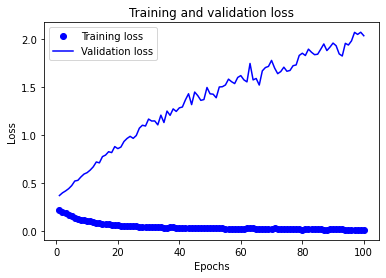

In [ ]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "bo", label= "Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()

<Figure size 432x288 with 0 Axes>